In [25]:
import glob
import matplotlib.pyplot as plt
from pydicom import dcmread
from PIL import Image
import re
from skimage.restoration import denoise_wavelet
from skimage import img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt
from skimage import io
from skimage.metrics import peak_signal_noise_ratio

files = glob.glob("/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/1-2 dose/*.IMA")
files

ref_files = glob.glob("/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/*.IMA")
ref_files

['/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.231.2022.06.09.18.13.45.991000.4.0.193442502.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.602.2022.06.09.18.13.47.125000.4.0.193451050.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.240.2022.06.09.18.13.46.018000.4.0.193442610.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.328.2022.06.09.18.13.46.288000.4.0.193443666.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.348.2022.06.09.18.13.46.348000.4.0.193443906.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062

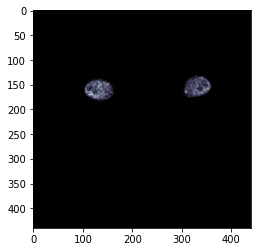

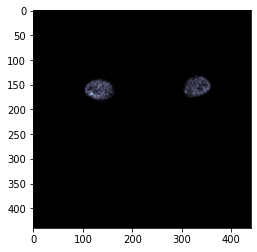

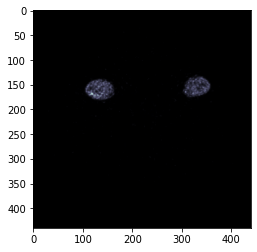

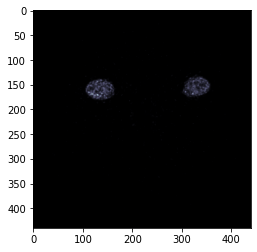

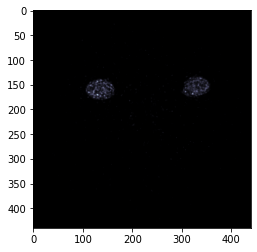

In [26]:


def show_img(img_path):
    ds = dcmread(img_path)
    im = Image.fromarray(ds.pixel_array)
    #im = im.resize((DESIRED_SIZE,DESIRED_SIZE)) 
    #im.show()
    plt.imshow(im, cmap=plt.cm.bone)
    plt.show()
    



files.sort(key=lambda f: int(re.sub('\D', '', f)))
files

ref_files.sort(key=lambda f: int(re.sub('\D', '', f)))

noisy_img = img_as_float(io.imread(files[5]))
ref_img = img_as_float(io.imread(ref_files[5]))
show_img(files[5])
show_img(files[4])
show_img(files[3])
show_img(files[2])
show_img(files[1])

In [15]:
wavelet_smoothed = denoise_wavelet(noisy_img, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)

denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3, multichannel=False)

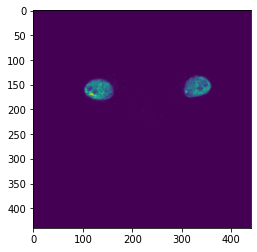

In [27]:
plt.imshow(ref_img)

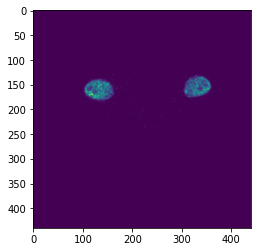

In [28]:

plt.imshow(noisy_img)

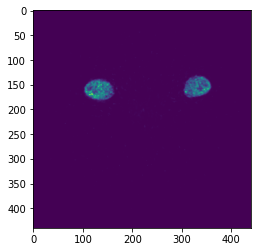

In [29]:
plt.imshow(denoise_TV)



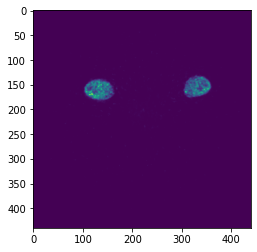

In [30]:
plt.imshow(wavelet_smoothed)